In [ ]:
import pandas as pd
import numpy as np
!pip install folium
import folium
import datetime
import matplotlib as plt
from folium.plugins import HeatMap
!pip install pyzipcode

     |████████████████████████████████| 1.9 MB 4.1 MB/s 
  Created wheel for pyzipcode: filename=pyzipcode-3.0.1-py3-none-any.whl size=1932413 sha256=fe143fcc8c1657dd3bf2e1655c54c2e9787172969c0aa7fa1031070c55ced40b
  Stored in directory: /root/.cache/pip/wheels/34/50/3a/603a8939ad45937f7a2712f5ff2942f21b1d8b3e4b47d6c5a1
Successfully built pyzipcode


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read data into a dataframe and display it
df = pd.read_excel('/content/drive/MyDrive/BMGT438/QUEST Fall 2021 Data.xlsx')
df

We need to see what rows are NaN and ask Maggie if the Primary Campaign Source means these are individual donors if the Primary Campaign Source = FY21 Individual. For now I will DROP.

In [ ]:
#Shows what rows were NaN for 'Type', there were only 5
non_na_df = df[df['Type'].notna()]
df[df['Type'].isna()]

Get all of the rows were the word "Individual" is in the type column

In [ ]:
individual_donors =  non_na_df.loc[non_na_df['Type'].str.contains("individual", case=False)]
individual_donors

We have 1835 Rows were we have a substring "Individual" in the 'Type' column. Let's see what types of individual donors there are (we can ask Maggie what each of these donor types mean).

In [ ]:
#Find all unique values in column 'Type'.
individual_donors['Type'].unique()

array(['Individual- Misc', 'Individual- Annual Event',
       'Individual- Year End', 'Individual- NRD'], dtype=object)

Goal of the next code block is to look through locations and make sure there are no matching/abbreviated cities

In [ ]:
locations = individual_donors['Mailing City'].unique()
locations = locations.tolist()
locations.pop(6)
locations.sort()
locations

['Aldie',
 'Alexandria',
 'Annandale',
 'Annapolis',
 'Arlington',
 'Ashburn',
 'Atlanta',
 'Baltimore',
 'Bartlesville',
 'Bealeton',
 'Beltsville',
 'Bethesda',
 'Boca Raton',
 'Boston',
 'Bowie',
 'Bradenton',
 'Bridgewater',
 'Brookhave',
 'Brooklyn',
 'Bryans Road',
 'Burke',
 'Cabin John',
 'California',
 'Camden',
 'Catonsville',
 'Centreville',
 'Chamblee',
 'Chantilly',
 'Charlottesville',
 'Chattanooga',
 'Chesapeake',
 'Chevy Chase',
 'Cheyenne',
 'Clifton',
 'Clinton',
 'College Park',
 'Colts Neck',
 'Columbia',
 'Cyress',
 'Dayton',
 'Decatur',
 'Delray Beach',
 'Derby',
 'Dumfries',
 'Ellicott City',
 'Erlanger',
 'Fairfax',
 'Fairfax Station',
 'Fairmont',
 'Falls Church',
 'Fayetteville',
 'Forest Hill',
 'Fort Belvoir',
 'Fort Washington',
 'Framingham',
 'Fredericksburg',
 'Ft. Washington',
 'Gainesville',
 'Gaithersburg',
 'Garden Grove',
 'Glen Allen',
 'Glenn Dale',
 'Grayson',
 'Great Falls',
 'Greenbelt',
 'Greensboro',
 'Greenville',
 'Hampstead',
 'Havertown',

We see that there is Fort Washington, MD and Ft.Washington, MD. Lets Change Ft. Washington to Fort Washington

In [ ]:
individual_donors["Mailing City"].replace("Ft. Washington", "Fort Washington", inplace=True)
locations = individual_donors['Mailing City'].unique()
locations

In [ ]:
individual_donors = individual_donors[individual_donors.Amount != 0]
individual_donors.sort_values(by=['Amount'])
individual_donors = individual_donors[individual_donors.Amount > 1]
individual_donors

In [ ]:
city_counts = individual_donors['Mailing City'].value_counts()
city_counts[:30]

Will have to use an API to convert zip code to (longitude,latitude) to create a map of the common locations, so I will make a dataframe of non NaN zipcodes

In [ ]:
zipcodes = individual_donors[~individual_donors['Mailing Zip/Postal Code'].isnull()]
individual_donors[individual_donors['Mailing Zip/Postal Code'].isna()]

Around 200 of our zip codes are NaN, for most of these it looks like the Mailing City and Mailing State are NaN as well.

In [ ]:
zipcodes['Mailing Zip/Postal Code'] = df['Mailing Zip/Postal Code'].str[:5]
x = zipcodes.groupby(['Mailing Zip/Postal Code'])['Mailing Zip/Postal Code'].count().sort_values(ascending=False)[0:53].reset_index(name='count')
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mailing Zip/Postal Code,count
0,22314,224
1,22301,210
2,22305,94
3,22302,82
4,22304,71
5,22315,44
6,22303,41
7,22309,34
8,22003,33
9,22308,27


In [ ]:
individual_donors

In [ ]:
zipcode_dic = dict()
f = open("/zipcode_data")
for line in f:
    line = line.strip('\n')
    (key, val1, val2) = line.split(",")
    zipcode_dic[key] = (val1,val2)
print(zipcode_dic)

FileNotFoundError: ignored

Now lets view where our donors are most heavily located using a map.

In [ ]:
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=11)
for index, row in zipcodes.iterrows():
  cur_zipcode = str(row['Mailing Zip/Postal Code'])
  try:
    lon, lat = zipcode_dic[cur_zipcode]
    folium.Marker(
                  location=[float(lon), float(lat)]
                ).add_to(map_osm)
  except:
    pass
map_osm

Now lets find the average donation amount of each type of donor.

In [ ]:
result = df.groupby('Mailing City').agg({'Amount': ['mean', 'min', 'max']}).reset_index()
print("Mean, min, and max values of Donation amounts grouped by Donor Type")
result.sort_values(by=('Amount', 'mean'), ascending=False)

In [ ]:
boca_raton = df[df['Mailing City']=='Boca Raton']
boca_raton

df[df['Mailing City']=='Oakton']


,Household/Organization ID,Donation ID,Type,Donation Date,Amount,First Gift Date,Last Gift Amount,Last Gift Date,Total Number of Gifts,Average Gift,Primary Campaign Source,Campaign #2,Campaign #3,Campaign #4,Stage,Mailing City,Mailing State/Province,Mailing Zip/Postal Code
390,0011Q000025IxTV,0061Q00000lHbXL,Individual- Year End,2018-12-10,250.0,2018-12-10,5000.0,2021-06-16,5,1960.0,2019 Year End,FY21 Individual,NaN,NaN,Posted,Oakton,VA,22124-2131
1122,0011Q000025IxTV,0061Q00000pkYwg,Individual- Year End,2019-12-17,1500.0,2018-12-10,5000.0,2021-06-16,5,1960.0,FY20 Individual,FY20 Year-End,NaN,NaN,Posted,Oakton,VA,22124-2131
1334,0011Q000025IxTV,0061Q00000rEP3W,Individual- Misc,2020-04-13,3000.0,2018-12-10,5000.0,2021-06-16,5,1960.0,FY20 Individual,FY20 Circle of Neighbors ($1000),FY20 Current Board Member,FY20 Spring2Act,Posted,Oakton,VA,22124-2131
1693,0011Q000025IxTV,0061Q00000uJjp7,Individual- Misc,2020-11-25,50.0,2018-12-10,5000.0,2021-06-16,5,1960.0,FY21 Individual,FY21 Giving Tuesday,FY21 Board Giving,NaN,Posted,Oakton,VA,22124-2131
2326,0011Q000025IxTV,0061Q00000wT1lY,Individual- Misc,2021-06-16,5000.0,2018-12-10,5000.0,2021-06-16,5,1960.0,FY21 Individual,NaN,FY21 Board Giving,FY21 Circle of Neighbors(1000+),Posted,Oakton,VA,22124-2131


In [ ]:
individual_donors.sort_values(by=['Total Number of Gifts'], ascending=False)

In [ ]:
individual_donors.sort_values(by=['Donation Date'], ascending=False)

In [ ]:
total_donations = individual_donors.groupby(['Household/Organization ID'])['Total Number of Gifts'].mean().sort_values(ascending=False)
total_donations[0:25]

In [ ]:
periods = pd.interval_range(start=datetime.datetime(2018, 6, 30), end=datetime.datetime(2021, 6, 29), periods=3, closed='left')
periods = pd.IntervalIndex(periods)
individual_donors['year_bin'] = pd.cut(individual_donors['Donation Date'], periods)
individual_donors

Since the dates of the data we got range between 7/1/18 and 6/28/2021 I created 3 bins with equal amount of days in them. The 3 ranges
6/30/18-6/30/19, 6/30/2019-6/29/2020, 6/29/2020-6/29/2021

In [ ]:
individual_donors.groupby(['year_bin'])['year_bin'].count()

Text(0.5, 0, 'Quarter')

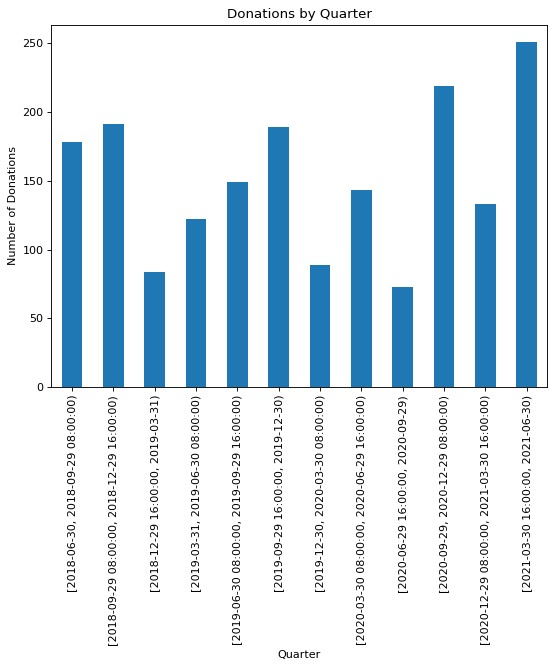

In [ ]:
plt.pyplot.figure(figsize=(8, 6), dpi=80)
periods2 = pd.interval_range(start=datetime.datetime(2018, 6, 30), end=datetime.datetime(2021, 6, 30), periods=12, closed='left')
periods2 = pd.IntervalIndex(periods2)
individual_donors['year_bin1'] = pd.cut(individual_donors['Donation Date'], periods2)
individual_donors.groupby(['year_bin1'])['year_bin1'].count().plot.bar(legend='')
plt.pyplot.title("Donations by Quarter")
plt.pyplot.ylabel("Number of Donations")
plt.pyplot.xlabel("Quarter")

In [ ]:
individual_donors.groupby(['year_bin'])['year_bin'].count()

year_bin
[2018-06-30, 2019-06-30)    574
[2019-06-30, 2020-06-29)    571
[2020-06-29, 2021-06-29)    676
Name: year_bin, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Month')

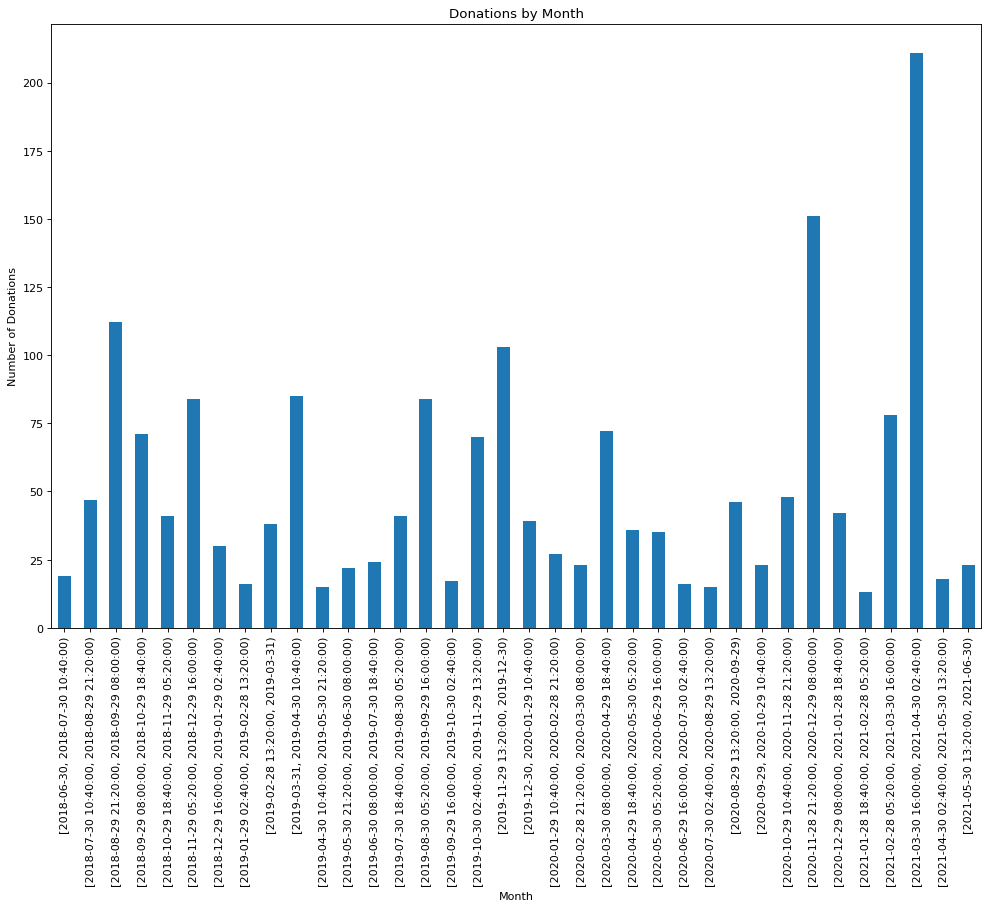

In [ ]:
plt.pyplot.figure(figsize=(15, 10), dpi=80)
periods3 = pd.interval_range(start=datetime.datetime(2018, 6, 30), end=datetime.datetime(2021, 6, 30), periods=36, closed='left')
periods3 = pd.IntervalIndex(periods3)
individual_donors['year_bin2'] = pd.cut(individual_donors['Donation Date'], periods3)
individual_donors.groupby(['year_bin2'])['year_bin2'].count().plot.bar(legend='')
plt.pyplot.title("Donations by Month")
plt.pyplot.ylabel("Number of Donations")
plt.pyplot.xlabel("Month")

In [ ]:
individual_donors.groupby(['year_bin2'])['year_bin2'].count()

year_bin2
[2018-06-30, 2018-07-30 10:40:00)              19
[2018-07-30 10:40:00, 2018-08-29 21:20:00)     47
[2018-08-29 21:20:00, 2018-09-29 08:00:00)    112
[2018-09-29 08:00:00, 2018-10-29 18:40:00)     71
[2018-10-29 18:40:00, 2018-11-29 05:20:00)     41
[2018-11-29 05:20:00, 2018-12-29 16:00:00)     84
[2018-12-29 16:00:00, 2019-01-29 02:40:00)     30
[2019-01-29 02:40:00, 2019-02-28 13:20:00)     16
[2019-02-28 13:20:00, 2019-03-31)              38
[2019-03-31, 2019-04-30 10:40:00)              85
[2019-04-30 10:40:00, 2019-05-30 21:20:00)     15
[2019-05-30 21:20:00, 2019-06-30 08:00:00)     22
[2019-06-30 08:00:00, 2019-07-30 18:40:00)     24
[2019-07-30 18:40:00, 2019-08-30 05:20:00)     41
[2019-08-30 05:20:00, 2019-09-29 16:00:00)     84
[2019-09-29 16:00:00, 2019-10-30 02:40:00)     17
[2019-10-30 02:40:00, 2019-11-29 13:20:00)     70
[2019-11-29 13:20:00, 2019-12-30)             103
[2019-12-30, 2020-01-29 10:40:00)              39
[2020-01-29 10:40:00, 2020-02-28 21:20:0

In [ ]:
individual_donors.groupby(['year_bin1', 'Type'])['year_bin1'].count()

In [ ]:
individual_donors.groupby(['Type'])['year_bin1'].count()

Type
Individual- Annual Event     291
Individual- Misc            1172
Individual- NRD               21
Individual- Year End         337
Name: year_bin1, dtype: int64

In [ ]:
type_to_num = {'Individual- Misc': 1, 'Individual- Annual Event': 2,
       'Individual- Year End': 3, 'Individual- NRD': 4}
individual_donors['type_mapping'] = df['Type'].map(type_to_num)

type_to_num = {'Individual- Misc': 1, 'Individual- Annual Event': 2,
       'Individual- Year End': 3, 'Individual- NRD': 4}
individual_donors['type_mapping'] = df['Type'].map(type_to_num)
individual_donors

In [ ]:
from collections import defaultdict
temp = defaultdict(lambda: len(temp))
res = [temp[ele] for ele in individual_donors['Primary Campaign Source']]
res
individual_donors['PCS_num']=res
individual_donors['city_num']=[temp[ele] for ele in individual_donors['Mailing City']]
individual_donors

In [ ]:
gift_amount = individual_donors.groupby(['Household/Organization ID'])['Average Gift', 'Total Number of Gifts'].mean().reset_index()
gift_amount = gift_amount.sort_values(by=['Average Gift'], ascending=False)
gift_amount
# gift_amount.plot.scatter(x='Total Number of Gifts',y= 'Average Gift')

In [ ]:
individual_donors['donation_length'] = (individual_donors['Last Gift Date'] - individual_donors['First Gift Date'])/np.timedelta64(1, 'M')
individual_donors
type(individual_donors['donation_length'])

In [ ]:
individual_donors['LTV'] = individual_donors['Total Number of Gifts'] * individual_donors['Average Gift']
individual_donors['ln_LTV'] = np.log(individual_donors['LTV'])
individual_donors['ln_avg']=np.log(individual_donors['Average Gift'])
no_out = individual_donors[(individual_donors['LTV']< 150000)]
boxplot = no_out.boxplot(column=['ln_LTV'], by=['Type'])
boxplot = no_out.boxplot(column=['ln_avg'], by=['Type'])

In [ ]:
zero_freq = individual_donors[(individual_donors['donation_length'] <= 0)]
individual_donors['donation_length']=individual_donors['donation_length'].replace(0,1)
individual_donors['freq'] = individual_donors['Total Number of Gifts']/individual_donors['donation_length']
individual_donors['freq'].mean()

0.5689537004543661

In [ ]:
individual_donors['freq'] = individual_donors['Total Number of Gifts']/individual_donors['donation_length']
individual_donors['ln_freq']=np.log(individual_donors['freq'])
boxplot = individual_donors.boxplot(column=['ln_freq'], by=['Type'])


In [ ]:
no_out = individual_donors[(individual_donors['ln_freq']> 0)]
no_out.plot.scatter(x='ln_freq', y='Average Gift')
outlier = individual_donors[(individual_donors['Average Gift'] > 17500)]



In [ ]:
# constructing fundraising report card
avg_ltv =individual_donors['LTV'].mean()
avg_don_amount = individual_donors['Average Gift'].mean()
one_v_many = individual_donors.loc[individual_donors['Total Number of Gifts'] == 1].count()/individual_donors.loc[individual_donors['Total Number of Gifts'] > 1].count()
don_freq = individual_donors['freq'].mean()

print(don_freq)

0.5689537004543661


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:        donation_length   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     598.0
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.03e-114
Time:                        02:41:02   Log-Likelihood:                -8965.7
No. Observations:                1820   AIC:                         1.794e+04
Df Residuals:                    1818   BIC:                         1.795e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9753      1.103     19.015      0.0

NameError: ignored

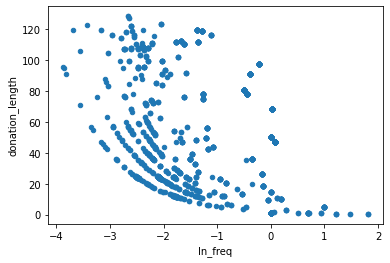

In [ ]:
no_out = individual_donors[(individual_donors['Average Gift']< 17500)]
no_out.plot.scatter(x='ln_freq', y='donation_length')
outlier = individual_donors[(individual_donors['Average Gift'] > 17500)]
outlier


import statsmodels.api as sm
from scipy.stats import f_oneway as ANOVA
import seaborn as sns
from scipy.stats import ttest_ind as t_test
YVar = no_out[["donation_length"]]
XVar = no_out[['ln_freq']]
XVar = sm.add_constant(XVar)
LinearModel = sm.OLS(YVar, XVar, missing='drop').fit()
print(LinearModel.summary())

logit_model = sm.Logit(YVar2, sm.add_constant(XVar2)).fit()
print(LinearModel.summary())

In [ ]:
distance_df = pd.read_excel('/content/drive/MyDrive/BMGT438/Distance from Rebuilding.xlsx')
distance_df.set_axis(['Mailing City', 'Distance'], axis=1, inplace=True)
individual_donors['Mailing City'] = individual_donors['Mailing City'].astype('string')
distance_df['Mailing City'] = distance_df['Mailing City'].astype('string')
distance_df = individual_donors.merge(distance_df,on="Mailing City", how="left")
distance_df
mdva =  distance_df[((distance_df['Mailing State/Province'] == 'VA')|(distance_df['Mailing State/Province'] == 'MD')|(distance_df['Mailing State/Province'] == 'DC'))]
mdva

ind_city = mdva.groupby('Mailing City').mean()
ind_city = ind_city[ind_city['Distance'].notna()]

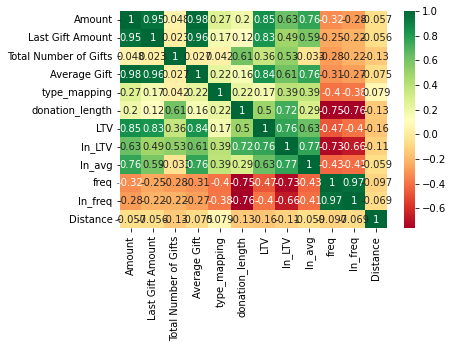

In [ ]:
import seaborn as sns
corrmat = ind_city.select_dtypes(include='number').corr()
top_corr_features = corrmat.index
#plot heat map
g=sns.heatmap(ind_city.select_dtypes(include='number')[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
ind_city[ind_city(['LTV']>2000)]

,Amount,Last Gift Amount,Total Number of Gifts,Average Gift,type_mapping,donation_length,LTV,ln_LTV,ln_avg,freq,ln_freq,Distance
Mailing City,,,,,,,,,,,,
Aldie,87.500000,87.500000,1.000000,87.500000,1.500000,1.000000,87.500000,4.461329,4.461329,1.000000,0.000000,46.30
Alexandria,180.000678,167.491453,18.983854,170.812045,1.593111,53.540103,2709.590291,6.742199,4.576152,0.485612,-1.189177,0.01
Annandale,15.454545,15.454545,47.060606,14.757576,1.272727,47.358261,477.393939,6.130151,2.434216,0.974797,-0.053530,14.80
Annapolis,37.500000,37.500000,1.000000,37.500000,1.000000,1.000000,37.500000,3.565449,3.565449,1.000000,0.000000,41.60
Arlington,137.086957,139.478261,3.608696,134.650217,1.956522,28.864798,422.762391,5.557663,4.512834,0.439595,-1.491862,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...
Washington,230.028736,216.120690,4.701149,228.831322,1.787356,15.024847,791.177414,5.539641,4.557231,0.622120,-0.903718,7.50
Westminster,25.000000,25.000000,1.000000,25.000000,1.000000,1.000000,25.000000,3.218876,3.218876,1.000000,0.000000,65.90
Wheaton,100.000000,100.000000,1.000000,100.000000,3.000000,1.000000,100.000000,4.605170,4.605170,1.000000,0.000000,28.20


In [ ]:
featAn = individual_donors
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
comp = featAn.select_dtypes(include = 'number') #independent channel columns
title = featAn['type_mapping']    #target column i.e source
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(comp, title)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(comp.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns
featureScores

ValueError: ignored

Text(0.5, 1.0, 'Intertial Values for Different Clusters')

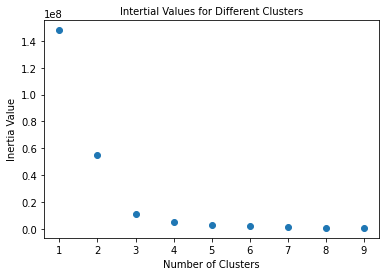

In [ ]:
from sklearn.cluster import KMeans
distortions = []
k = range(1,10)
reduced = ind_city[['Distance','LTV']]

for value in k:
    kmeans = KMeans(init='k-means++', n_clusters=value, n_init=10)
    model = kmeans.fit(reduced)
    distortions.append(model.inertia_)

distortions

import matplotlib.pyplot as plt
plt.scatter(k,distortions)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Intertial Values for Different Clusters", size=10)

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

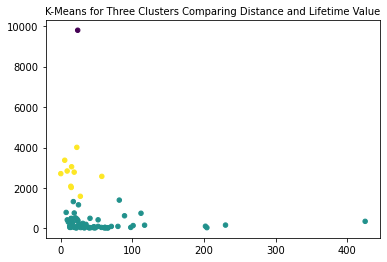

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, algorithm = 'elkan')
kmeans.fit(reduced)
kmeans_samp = kmeans.predict(reduced)
#full = np.concatenate(reduce_spec, kmeans_samp)

fig, ax = plt.subplots()

ax.scatter(reduced['Distance'], reduced['LTV'], c=kmeans_samp, s=20, cmap='viridis')
ax.set_title('K-Means for Three Clusters Comparing Distance and Lifetime Value', size=10)
kmeans_samp


In [ ]:
ind_city_max = mdva.groupby(['Mailing City'])['Amount'].max().reset_index()
ind_city = mdva.groupby(['Mailing City']).mean()
distances = pd.read_excel('/content/drive/MyDrive/BMGT438/Distance from Rebuilding.xlsx')
distances.set_axis(['Mailing City', 'Distance'], axis=1, inplace=True)
ind_city_max['Mailing City'] = ind_city_max['Mailing City'].astype('string')
distances['Mailing City'] = distances['Mailing City'].astype('string')
ind_city_max = ind_city_max.merge(distances,on="Mailing City", how="left")
ind_city_max.columns


Index(['Mailing City', 'Amount', 'Distance'], dtype='object')

In [ ]:
reduced = ind_city_max[['Distance','Amount']]
reduced = reduced.dropna()
reduced_no_out = reduced[(reduced['Amount'] < 2000)]
reduced_no_out = reduced_no_out[(reduced_no_out['Distance'] < 60)]
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, algorithm = 'full')
kmeans.fit(reduced_no_out)
kmeans_samp = kmeans.predict(reduced_no_out)
ind_new = ind_city_max[ind_city_max['Distance'] <= 20]
ind_new

,Mailing City,Amount,Distance
1,Alexandria,7000.0,0.01
2,Annandale,100.0,14.80
4,Arlington,500.0,9.00
9,Bethesda,500.0,14.40
11,Bryans Road,50.0,18.90
12,Burke,500.0,14.60
13,Cabin John,250.0,16.00
27,Fairfax,1500.0,17.50
28,Fairfax Station,500.0,18.80
29,Falls Church,500.0,14.00


In [ ]:
num_data = ind_city[['LTV', 'Distance','freq']]


,LTV,Distance,freq,Amount
Aldie,87.500000,46.30,1.000000,NaN
Alexandria,2709.590291,0.01,0.485612,NaN
Annandale,477.393939,14.80,0.974797,NaN
Annapolis,37.500000,41.60,1.000000,NaN
Arlington,422.762391,9.00,0.439595,NaN
...,...,...,...,...
76,NaN,NaN,NaN,3500.0
77,NaN,NaN,NaN,25.0
78,NaN,NaN,NaN,100.0
79,NaN,NaN,NaN,500.0


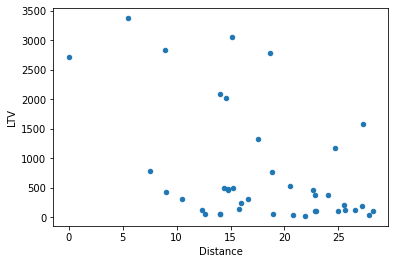

In [ ]:
individual_donors['LTV'] = individual_donors['Total Number of Gifts'] * individual_donors['Average Gift']
no_out = ind_city[((ind_city['LTV'] <= 4000)& (ind_city['Distance'] <= 30))]
no_out.plot.scatter(x='Distance', y='LTV')

array([1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int32)

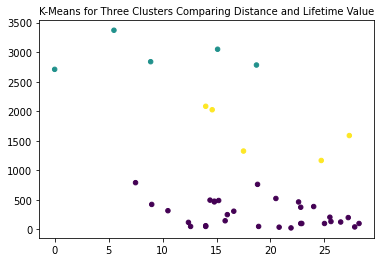

In [ ]:
reduced = no_out[['Distance','LTV']]
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, algorithm = 'full')
kmeans.fit(reduced)
kmeans_samp = kmeans.predict(reduced)
fig, ax = plt.subplots()

ax.scatter(reduced['Distance'], reduced['LTV'], c=kmeans_samp, s=20, cmap='viridis')
ax.set_title('K-Means for Three Clusters Comparing Distance and Lifetime Value', size=10)
kmeans_samp

In [ ]:
ind_city_target = ind_city[((ind_city['LTV'] < 1000) & (ind_city['Distance'] <= 20))]
ind_city_target

,Amount,Last Gift Amount,Total Number of Gifts,Average Gift,type_mapping,donation_length,LTV,ln_LTV,ln_avg,freq,ln_freq,Distance
Mailing City,,,,,,,,,,,,
Annandale,15.454545,15.454545,47.060606,14.757576,1.272727,47.358261,477.393939,6.130151,2.434216,0.974797,-0.053530,14.8
Arlington,137.086957,139.478261,3.608696,134.650217,1.956522,28.864798,422.762391,5.557663,4.512834,0.439595,-1.491862,9.0
Bethesda,157.878788,166.212121,3.303030,157.999697,1.515152,20.851958,495.302121,5.818671,4.772526,0.331909,-1.511379,14.4
Bryans Road,50.000000,50.000000,1.000000,50.000000,1.000000,1.000000,50.000000,3.912023,3.912023,1.000000,0.000000,18.9
Cabin John,250.000000,250.000000,1.000000,250.000000,1.000000,1.000000,250.000000,5.521461,5.521461,1.000000,0.000000,16.0
Fairfax Station,262.500000,387.500000,2.500000,262.497500,2.000000,18.435178,762.492500,6.158815,5.334855,0.342795,-1.567258,18.8
Forest Hill,50.000000,50.000000,1.000000,50.000000,1.000000,1.000000,50.000000,3.912023,3.912023,1.000000,0.000000,14.0
Fort Washington,119.000000,119.000000,1.000000,119.000000,1.000000,1.000000,119.000000,4.492178,4.492178,1.000000,0.000000,12.4
Hyattsville,34.375000,31.250000,9.625000,34.375625,1.562500,12.093548,307.814375,5.595020,3.525350,0.983994,-0.255352,16.6


In [ ]:
no_out = ind_city[((ind_city['LTV'] <= 4000)& (ind_city['Distance'] <= 60))]
reduced = no_out[['Distance','freq']]
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, algorithm = 'full')
kmeans.fit(reduced)
kmeans_samp = kmeans.predict(reduced)
ind_freq = ind_city[ind_city['freq'] >= 1]
ind_freq

,Amount,Last Gift Amount,Total Number of Gifts,Average Gift,type_mapping,donation_length,LTV,ln_LTV,ln_avg,freq,ln_freq,Distance
Mailing City,,,,,,,,,,,,
Aldie,87.500000,87.500000,1.0,87.500000,1.500000,1.0,87.500000,4.461329,4.461329,1.0,0.0,46.3
Annapolis,37.500000,37.500000,1.0,37.500000,1.000000,1.0,37.500000,3.565449,3.565449,1.0,0.0,41.6
Ashburn,25.000000,25.000000,1.0,25.000000,1.000000,1.0,25.000000,3.218876,3.218876,1.0,0.0,39.7
Baltimore,50.000000,50.000000,1.0,50.000000,1.000000,1.0,50.000000,3.626223,3.626223,1.0,0.0,56.6
Bealeton,25.000000,25.000000,1.0,25.000000,1.000000,1.0,25.000000,3.218876,3.218876,1.0,0.0,60.9
Beltsville,375.000000,375.000000,1.0,375.000000,1.000000,1.0,375.000000,5.868035,5.868035,1.0,0.0,22.8
Bowie,41.666667,41.666667,1.0,41.666667,1.333333,1.0,41.666667,3.680974,3.680974,1.0,0.0,27.8
Bryans Road,50.000000,50.000000,1.0,50.000000,1.000000,1.0,50.000000,3.912023,3.912023,1.0,0.0,18.9
Cabin John,250.000000,250.000000,1.0,250.000000,1.000000,1.0,250.000000,5.521461,5.521461,1.0,0.0,16.0


In [ ]:
mdva

,Household/Organization ID,Donation ID,Type,Donation Date,Amount,First Gift Date,Last Gift Amount,Last Gift Date,Total Number of Gifts,Average Gift,Primary Campaign Source,Campaign #2,Campaign #3,Campaign #4,Stage,Mailing City,Mailing State/Province,Mailing Zip/Postal Code,year_bin,PCS_num,city_num,donation_length,LTV,ln_LTV,ln_avg,freq,ln_freq,type_mapping,Distance
0,0013600001NcPT3,0063600000gaSmL,Individual- Misc,2018-07-01,25.0,2017-09-20,25.0,2021-09-01,51,38.63,FY21 Individual,2019 Current Board Member,2019 Monthly Giving,NaN,Posted,Alexandria,VA,22314,"[2018-06-30, 2019-06-30)",0,28,47.376743,1970.13,7.585855,3.654029,1.076478,0.073694,1.0,0.01
1,0013600001HwC1c,0063600000gaqQI,Individual- Misc,2018-07-02,25.0,2017-12-13,50.0,2019-08-09,4,40.00,FY21 Individual,2019 Summer Newsletter,NaN,NaN,Posted,Alexandria,VA,22310-1429,"[2018-06-30, 2019-06-30)",0,28,19.844350,160.00,5.075174,3.688879,0.201569,-1.601625,1.0,0.01
2,0013600001OtPQT,0063600000gaqPA,Individual- Misc,2018-07-03,100.0,2017-12-03,200.0,2021-08-05,15,191.33,FY21 Individual,2019 Summer Newsletter,NaN,NaN,Posted,Alexandria,VA,22312,"[2018-06-30, 2019-06-30)",0,28,44.058400,2869.95,7.962050,5.254000,0.340457,-1.077466,1.0,0.01
3,00136000008ZXXr,0063600000gaqOv,Individual- Misc,2018-07-05,10.0,2014-09-04,10.0,2018-07-05,5,14.00,FY21 Individual,2019 Summer Newsletter,NaN,NaN,Posted,Bethesda,MD,20814-6550,"[2018-06-30, 2019-06-30)",0,29,45.996838,70.00,4.248495,2.639057,0.108703,-2.219135,1.0,14.40
4,00136000008ZXWk,0063600000gaoLV,Individual- Misc,2018-07-05,30.0,2014-10-30,100.0,2021-04-26,50,37.20,FY21 Individual,2019 Current Board Member,2019 Monthly Giving,NaN,Posted,Alexandria,VA,22315-5570,"[2018-06-30, 2019-06-30)",0,28,77.866075,1860.00,7.528332,3.616309,0.642128,-0.442967,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,00136000008ZYgR,0061Q00000wScRb,Individual- Misc,2021-06-21,150.0,2012-05-02,150.0,2021-09-21,21,145.24,FY21 Individual,FY21 Monthly Giving,FY21 Board Giving,FY21 Circle of Neighbors(250+),Posted,Fort Belvoir,VA,22060-7406,"[2020-06-29, 2021-06-29)",0,104,112.659398,3050.04,8.022910,4.978388,0.186403,-1.679847,1.0,15.10
1817,00136000008ZXUe,0061Q00000wTXXs,Individual- Misc,2021-06-22,100.0,2016-11-28,100.0,2021-06-22,2,62.50,FY21 Individual,NaN,NaN,NaN,Posted,Alexandria,VA,22305-3002,"[2020-06-29, 2021-06-29)",0,28,54.769092,125.00,4.828314,4.135167,0.036517,-3.309979,1.0,0.01
1818,0011Q000021rXWw,0061Q00000wT2Y0,Individual- Misc,2021-06-23,25.0,2019-07-18,25.0,2021-06-23,9,22.78,FY21 Individual,NaN,NaN,NaN,Posted,Alexandria,VA,22305-3039,"[2020-06-29, 2021-06-29)",0,28,23.195548,205.02,5.323108,3.125883,0.388005,-0.946736,1.0,0.01
1819,0013600001s402Z,0061Q00000wTXYH,Individual- Misc,2021-06-27,30.0,2018-12-16,30.0,2021-09-19,8,30.00,FY21 Individual,NaN,NaN,NaN,Posted,Falls Church,VA,22041-3130,"[2020-06-29, 2021-06-29)",0,30,33.117723,240.00,5.480639,3.401197,0.241562,-1.420627,1.0,14.00


In [ ]:
reduced = distances[['Distance',"('Amount', 'max')"]]
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced)
kmeans_samp = kmeans.predict(reduced)


fig, ax = plt.subplots()

ax.scatter(reduced['Distance'], reduced["(Amount, max)"], c=kmeans_samp, s=20, cmap='viridis')
ax.set_title('K-Means for Three Clusters Comparing Distance and Largest Donation Amount', size=10)
kmeans_samp

NameError: ignored

In [ ]:
MD_donors = individual_donors.loc[individual_donors['Mailing State/Province'] == 'MD']
DC_donors = individual_donors.loc[individual_donors['Mailing State/Province'] == 'DC']
DC_donors['Mailing City'].unique()

<StringArray>
['Washington']
Length: 1, dtype: string

In [ ]:
individual_donors.sort_values(by=['Amount'], ascending=True)

,Household/Organization ID,Donation ID,Type,Donation Date,Amount,First Gift Date,Last Gift Amount,Last Gift Date,Total Number of Gifts,Average Gift,Primary Campaign Source,Campaign #2,Campaign #3,Campaign #4,Stage,Mailing City,Mailing State/Province,Mailing Zip/Postal Code,year_bin,year_bin1,year_bin2,type_mapping,PCS_num,city_num,donation_length,LTV,ln_LTV,ln_avg,freq,ln_freq
1115,0011Q00002Dtavz,0061Q00000qXerv,Individual- Misc,2019-12-16,1.25,2019-12-16,1.25,2019-12-16,1,1.25,FY20 Individual,Anonymous-Donor,FY20 Year-End,NaN,Posted,NaN,NaN,NaN,"[2019-06-30, 2020-06-29)","[2019-09-29 16:00:00, 2019-12-30)","[2019-11-29 13:20:00, 2019-12-30)",1.0,21,1,1.000000,1.25,0.223144,0.223144,1.000000,0.000000
1181,0011Q00002Dtbc0,0061Q00000qXf6R,Individual- Year End,2019-12-31,1.25,2019-12-31,1.25,2019-12-31,1,1.25,FY20 Individual,Anonymous-Donor,FY20 Year-End,NaN,Posted,NaN,NaN,NaN,"[2019-06-30, 2020-06-29)","[2019-12-30, 2020-03-30 08:00:00)","[2019-12-30, 2020-01-29 10:40:00)",3.0,21,1,1.000000,1.25,0.223144,0.223144,1.000000,0.000000
1013,0011Q00002DtaLB,0061Q00000qXegY,Individual- Misc,2019-11-20,1.25,2019-11-20,1.25,2019-11-20,1,1.25,FY20 Individual,Anonymous-Donor,NaN,NaN,Posted,NaN,NaN,NaN,"[2019-06-30, 2020-06-29)","[2019-09-29 16:00:00, 2019-12-30)","[2019-10-30 02:40:00, 2019-11-29 13:20:00)",1.0,21,1,1.000000,1.25,0.223144,0.223144,1.000000,0.000000
1129,0011Q00002Dtazh,0061Q00000qXesj,Individual- Misc,2019-12-19,1.25,2019-12-19,1.25,2019-12-19,1,1.25,FY20 Individual,Anonymous-Donor,FY20 Year-End,NaN,Posted,NaN,NaN,NaN,"[2019-06-30, 2020-06-29)","[2019-09-29 16:00:00, 2019-12-30)","[2019-11-29 13:20:00, 2019-12-30)",1.0,21,1,1.000000,1.25,0.223144,0.223144,1.000000,0.000000
1391,0011Q00002DtX4B,0061Q00000sGv8K,Individual- Misc,2020-04-20,2.00,2019-11-26,2.00,2020-04-20,3,3.00,FY20 Individual,NaN,NaN,NaN,Posted,NaN,NaN,NaN,"[2019-06-30, 2020-06-29)","[2020-03-30 08:00:00, 2020-06-29 16:00:00)","[2020-03-30 08:00:00, 2020-04-29 18:40:00)",1.0,21,1,4.796813,9.00,2.197225,1.098612,0.625415,-0.469339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0013600000IEhzf,0061Q00000oRfQD,Individual- Misc,2019-09-10,5000.00,2012-02-11,1000.00,2021-06-11,29,390.20,FY20 Individual,NaN,NaN,NaN,Posted,Alexandria,VA,22303-1023,"[2019-06-30, 2020-06-29)","[2019-06-30 08:00:00, 2019-09-29 16:00:00)","[2019-08-30 05:20:00, 2019-09-29 16:00:00)",1.0,21,28,111.969445,11315.80,9.333955,5.966659,0.258999,-1.350930
365,00136000008ZXNo,0061Q00000lHbRI,Individual- Year End,2018-11-29,6000.00,2011-05-05,150.00,2021-04-28,30,1350.50,2019 Year End,2019 Current Board Member,FY21 Individual,NaN,Posted,Alexandria,VA,22314-2228,"[2018-06-30, 2019-06-30)","[2018-09-29 08:00:00, 2018-12-29 16:00:00)","[2018-10-29 18:40:00, 2018-11-29 05:20:00)",3.0,11,28,119.788907,40515.00,10.609428,7.208230,0.250441,-1.384534
1004,00136000008ZXNo,0061Q00000pi4qV,Individual- Year End,2019-11-20,6500.00,2011-05-05,150.00,2021-04-28,30,1350.50,FY20 Individual,FY20 Year-End,FY20 Current Board Member,FY20 Circle of Neighbors ($1000),Posted,Alexandria,VA,22314-2228,"[2019-06-30, 2020-06-29)","[2019-09-29 16:00:00, 2019-12-30)","[2019-10-30 02:40:00, 2019-11-29 13:20:00)",3.0,21,28,119.788907,40515.00,10.609428,7.208230,0.250441,-1.384534
1617,00136000008ZXNo,0061Q00000t2rzM,Individual- Misc,2020-10-02,7000.00,2011-05-05,150.00,2021-04-28,30,1350.50,FY21 Individual,NaN,FY21 Board Giving,FY21 Circle of Neighbors(1000+),Posted,Alexandria,VA,22314-2228,"[2020-06-29, 2021-06-29)","[2020-09-29, 2020-12-29 08:00:00)","[2020-09-29, 2020-10-29 10:40:00)",1.0,0,28,119.788907,40515.00,10.609428,7.208230,0.250441,-1.384534


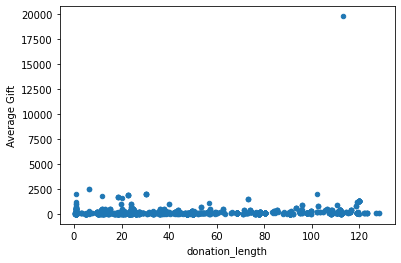

In [ ]:
no_out = individual_donors[(individual_donors['Mailing City']!='Boca Raton')]
no_out.plot.scatter(x='donation_length', y='Average Gift')

In [ ]:
individual_donors.sort_values(by=['Amount'], ascending=False)

,Household/Organization ID,Donation ID,Type,Donation Date,Amount,First Gift Date,Last Gift Amount,Last Gift Date,Total Number of Gifts,Average Gift,Primary Campaign Source,Campaign #2,Campaign #3,Campaign #4,Stage,Mailing City,Mailing State/Province,Mailing Zip/Postal Code,year_bin,year_bin1,year_bin2,type_mapping,PCS_num,city_num,donation_length,LTV,ln_LTV,ln_avg,freq,ln_freq
259,0013600001IZpOj,0061Q00000m82Wi,Individual- Misc,2018-10-17,20000.00,2020-06-16,500.00,2021-09-10,3,266.67,2019 Board Pledge,NaN,NaN,NaN,Pledged,Atlanta,GA,30309-3958,"[2018-06-30, 2019-06-30)","[2018-09-29 08:00:00, 2018-12-29 16:00:00)","[2018-09-29 08:00:00, 2018-10-29 18:40:00)",1.0,4,57,14.817553,800.01,6.684624,5.586012,0.202463,-1.597200
1617,00136000008ZXNo,0061Q00000t2rzM,Individual- Misc,2020-10-02,7000.00,2011-05-05,150.00,2021-04-28,30,1350.50,FY21 Individual,NaN,FY21 Board Giving,FY21 Circle of Neighbors(1000+),Posted,Alexandria,VA,22314-2228,"[2020-06-29, 2021-06-29)","[2020-09-29, 2020-12-29 08:00:00)","[2020-09-29, 2020-10-29 10:40:00)",1.0,0,28,119.788907,40515.00,10.609428,7.208230,0.250441,-1.384534
1004,00136000008ZXNo,0061Q00000pi4qV,Individual- Year End,2019-11-20,6500.00,2011-05-05,150.00,2021-04-28,30,1350.50,FY20 Individual,FY20 Year-End,FY20 Current Board Member,FY20 Circle of Neighbors ($1000),Posted,Alexandria,VA,22314-2228,"[2019-06-30, 2020-06-29)","[2019-09-29 16:00:00, 2019-12-30)","[2019-10-30 02:40:00, 2019-11-29 13:20:00)",3.0,21,28,119.788907,40515.00,10.609428,7.208230,0.250441,-1.384534
365,00136000008ZXNo,0061Q00000lHbRI,Individual- Year End,2018-11-29,6000.00,2011-05-05,150.00,2021-04-28,30,1350.50,2019 Year End,2019 Current Board Member,FY21 Individual,NaN,Posted,Alexandria,VA,22314-2228,"[2018-06-30, 2019-06-30)","[2018-09-29 08:00:00, 2018-12-29 16:00:00)","[2018-10-29 18:40:00, 2018-11-29 05:20:00)",3.0,11,28,119.788907,40515.00,10.609428,7.208230,0.250441,-1.384534
258,00136000008ZXNo,0061Q00000m82WT,Individual- Misc,2018-10-17,5000.00,2011-05-05,150.00,2021-04-28,30,1350.50,2019 Board Pledge,NaN,NaN,NaN,Pledged,Alexandria,VA,22314-2228,"[2018-06-30, 2019-06-30)","[2018-09-29 08:00:00, 2018-12-29 16:00:00)","[2018-09-29 08:00:00, 2018-10-29 18:40:00)",1.0,4,28,119.788907,40515.00,10.609428,7.208230,0.250441,-1.384534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,0011Q00002DtX4B,0061Q00000sGv8K,Individual- Misc,2020-04-20,2.00,2019-11-26,2.00,2020-04-20,3,3.00,FY20 Individual,NaN,NaN,NaN,Posted,NaN,NaN,NaN,"[2019-06-30, 2020-06-29)","[2020-03-30 08:00:00, 2020-06-29 16:00:00)","[2020-03-30 08:00:00, 2020-04-29 18:40:00)",1.0,21,1,4.796813,9.00,2.197225,1.098612,0.625415,-0.469339
1129,0011Q00002Dtazh,0061Q00000qXesj,Individual- Misc,2019-12-19,1.25,2019-12-19,1.25,2019-12-19,1,1.25,FY20 Individual,Anonymous-Donor,FY20 Year-End,NaN,Posted,NaN,NaN,NaN,"[2019-06-30, 2020-06-29)","[2019-09-29 16:00:00, 2019-12-30)","[2019-11-29 13:20:00, 2019-12-30)",1.0,21,1,1.000000,1.25,0.223144,0.223144,1.000000,0.000000
1013,0011Q00002DtaLB,0061Q00000qXegY,Individual- Misc,2019-11-20,1.25,2019-11-20,1.25,2019-11-20,1,1.25,FY20 Individual,Anonymous-Donor,NaN,NaN,Posted,NaN,NaN,NaN,"[2019-06-30, 2020-06-29)","[2019-09-29 16:00:00, 2019-12-30)","[2019-10-30 02:40:00, 2019-11-29 13:20:00)",1.0,21,1,1.000000,1.25,0.223144,0.223144,1.000000,0.000000
1181,0011Q00002Dtbc0,0061Q00000qXf6R,Individual- Year End,2019-12-31,1.25,2019-12-31,1.25,2019-12-31,1,1.25,FY20 Individual,Anonymous-Donor,FY20 Year-End,NaN,Posted,NaN,NaN,NaN,"[2019-06-30, 2020-06-29)","[2019-12-30, 2020-03-30 08:00:00)","[2019-12-30, 2020-01-29 10:40:00)",3.0,21,1,1.000000,1.25,0.223144,0.223144,1.000000,0.000000


In [ ]:
individual_donors.groupby(['Primary Campaign Source'])['Amount', 'Total Number of Gifts'].sum().sort_values(by=['Amount'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Amount,Total Number of Gifts
Primary Campaign Source,,
FY21 Individual,156922.14,10438
FY20 Individual,73447.08,5918
2019 Board Pledge,28770.00,227
2019 Year End,23615.00,654
2019 Spring2ACTion,8221.92,632
FY20 Raise a Roof,7035.00,607
2019 Circle of Neighbors$1000,5000.00,2
FY19 NRD,4575.00,34
2019 Ryan-Mark Friendraiser,4570.00,135


In [ ]:
import seaborn as sns
#get correlations of each features in dataset
don_mat = individual_donors.select_dtypes(include='number')
don_mat

,Amount,Last Gift Amount,Total Number of Gifts,Average Gift,type_mapping,PCS_num,city_num,donation_length,LTV,ln_LTV,ln_avg,freq,ln_freq
1,25.0,25.0,51,38.63,1.0,0,28,47.376743,1970.13,7.585855,3.654029,1.076478,0.073694
7,25.0,50.0,4,40.00,1.0,0,28,19.844350,160.00,5.075174,3.688879,0.201569,-1.601625
10,100.0,200.0,15,191.33,1.0,0,28,44.058400,2869.95,7.962050,5.254000,0.340457,-1.077466
12,10.0,10.0,5,14.00,1.0,0,29,45.996838,70.00,4.248495,2.639057,0.108703,-2.219135
13,30.0,100.0,50,37.20,1.0,0,28,77.866075,1860.00,7.528332,3.616309,0.642128,-0.442967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,250.0,250.0,10,255.00,4.0,27,1,111.016653,2550.00,7.843849,5.541264,0.090077,-2.407095
2331,100.0,100.0,2,62.50,1.0,0,28,54.769092,125.00,4.828314,4.135167,0.036517,-3.309979
2332,25.0,25.0,9,22.78,1.0,0,28,23.195548,205.02,5.323108,3.125883,0.388005,-0.946736
2333,30.0,30.0,8,30.00,1.0,0,30,33.117723,240.00,5.480639,3.401197,0.241562,-1.420627


pandas.core.series.Series

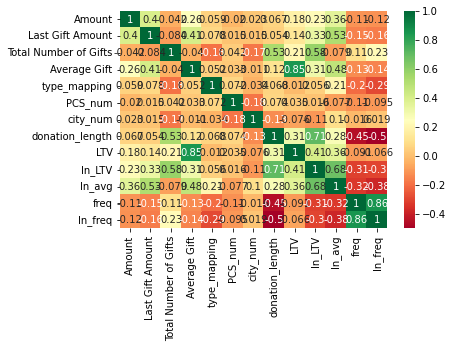

In [ ]:
corrmat = don_mat.corr()
top_corr_features = corrmat.index
#plot heat map
g=sns.heatmap(don_mat[top_corr_features].corr(),annot=True,cmap="RdYlGn")

individual_donors.sort_values(by=['LTV'], ascending=False)
type(individual_donors['donation_length'])

In [ ]:
reduced[:,0]

array([   19.90826378, -1785.74651441,   930.35788423, ...,
       -1742.16549894, -1706.65104901,  -413.81479737])

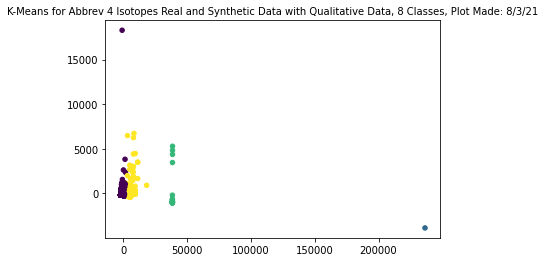

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced)
kmeans_samp = kmeans.predict(reduced)
#full = np.concatenate(reduce_spec, kmeans_samp)

fig, ax = plt.subplots()

ax.scatter(reduced[:, 0], reduced[:, 1], c=kmeans_samp, s=20, cmap='viridis')
ax.set_title('K-Means for Abbrev 4 Isotopes Real and Synthetic Data with Qualitative Data, 8 Classes, Plot Made: 8/3/21', size=10)

xlim = (reduced[:, 0].min() , reduced[:, 0].max())
ylim = (reduced[:, 1].min(), reduced[:, 1].max())


xg = np.linspace(xlim[0], xlim[1], 10)
yg = np.linspace(ylim[0], ylim[1], 10)